<a href="https://colab.research.google.com/github/kiranvakkalagadda/data-science-practice/blob/main/week2_pandas_numpy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df=pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df[['total_bill','tip','sex','smoker']]

,total_bill,tip,sex,smoker
0,16.99,1.01,Female,No
1,10.34,1.66,Male,No
2,21.01,3.50,Male,No
3,23.68,3.31,Male,No
4,24.59,3.61,Female,No
...,...,...,...,...
239,29.03,5.92,Male,No
240,27.18,2.00,Female,Yes
241,22.67,2.00,Male,Yes
242,17.82,1.75,Male,No


In [10]:
df[df['tip']>=2]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [11]:
df.count()

,0
total_bill,244
tip,244
sex,244
smoker,244
day,244
time,244
size,244


In [12]:
average_bill = df['total_bill'].mean()
print(f"The average total bill amount is: {average_bill:.2f}")

The average total bill amount is: 19.79


In [13]:
total_tip_men = df[df['sex'] == 'Male']['tip'].sum()
print(f"The total tip amount given by men is: {total_tip_men:.2f}")

The total tip amount given by men is: 485.07


In [14]:
total_tip_women=df[df['sex']=='Female']['tip'].sum()
print(f'The total tip amount given by women is: {total_tip_women:.2f}')

The total tip amount given by women is: 246.51


In [15]:
grouped_tip=df.groupby('sex')['tip'].sum()
print(grouped_tip)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64


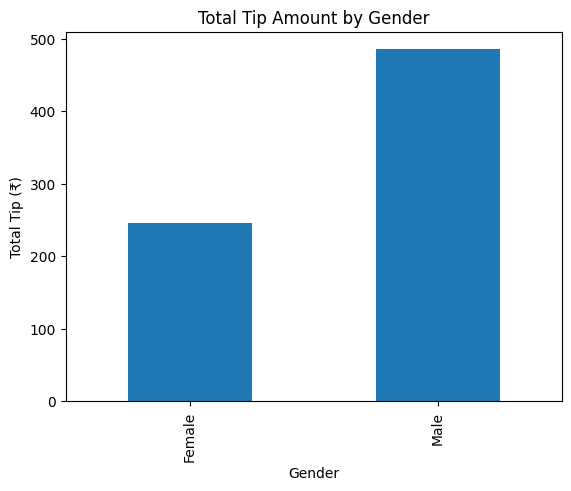

In [21]:
# This is to identify that which gender gives more tip and that can be shown visually
import matplotlib.pyplot as plt

grouped_tips = df.groupby('sex')['tip'].sum()
grouped_tips.plot(kind='bar', title='Total Tip Amount by Gender')
plt.ylabel('Total Tip (₹)')
plt.xlabel('Gender')
plt.show()


In [23]:
#This gives total count of each gender
count_of_male_female=df['sex'].value_counts()
print(count_of_male_female)

sex
Male      157
Female     87
Name: count, dtype: int64


In [24]:
# This gives the average tip on basis of gender.
print(df.groupby('sex')['tip'].mean())


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [25]:
# Multi-column groupby (to identify day wise, gender wise and average tips )
avg_tip = df.groupby(['day', 'sex'])['tip'].mean().reset_index()
print(avg_tip)


    day     sex       tip
0   Fri  Female  2.781111
1   Fri    Male  2.693000
2   Sat  Female  2.801786
3   Sat    Male  3.083898
4   Sun  Female  3.367222
5   Sun    Male  3.220345
6  Thur  Female  2.575625
7  Thur    Male  2.980333


In [26]:
pivot = df.pivot_table(values='tip', index='day', columns='sex', aggfunc='mean')
print(pivot)


sex     Female      Male
day                     
Fri   2.781111  2.693000
Sat   2.801786  3.083898
Sun   3.367222  3.220345
Thur  2.575625  2.980333


In [27]:
pivot = pivot[['Male', 'Female']]
print(pivot)


sex       Male    Female
day                     
Fri   2.693000  2.781111
Sat   3.083898  2.801786
Sun   3.220345  3.367222
Thur  2.980333  2.575625


In [4]:
#lets change the dataset and work on banking loan approval info
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv"
df = pd.read_csv(url)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#total rows and columns in the data frame
df.shape

(614, 13)

In [6]:
print(f"Total records: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Total records: 614
Total columns: 13


In [7]:
#This will show you how many missing values are in each column, from most to least.
df.isnull().sum().sort_values(ascending=False)



,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


In [ ]:
# Step 1: Drop rows with missing credit history
df = df.dropna(subset=['Credit_History'])

# Step 2: Fill Self_Employed with mode
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Step 3: Fill LoanAmount with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


In [9]:
df.isnull().sum()


,0
Loan_ID,0
Gender,12
Married,3
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [11]:
# Summary stats
print(df[['ApplicantIncome', 'LoanAmount']].describe())




       ApplicantIncome  LoanAmount
count       564.000000  564.000000
mean       5466.436170  144.414894
std        6271.344106   81.812775
min         150.000000    9.000000
25%        2892.750000  101.750000
50%        3815.000000  127.000000
75%        5803.750000  162.000000
max       81000.000000  700.000000


<Axes: >

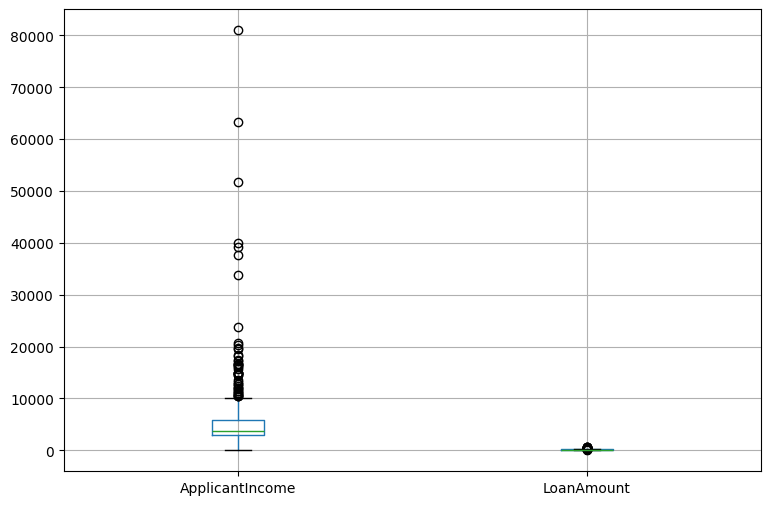

In [14]:
# Visualize outliers
df[['ApplicantIncome', 'LoanAmount']].boxplot(figsize=(9,6))

In [15]:
import numpy as np

df['Log_ApplicantIncome'] = np.log(df['ApplicantIncome'])
df[['ApplicantIncome', 'Log_ApplicantIncome']].head()


,ApplicantIncome,Log_ApplicantIncome
0,5849,8.674026
1,4583,8.430109
2,3000,8.006368
3,2583,7.856707
4,6000,8.699515
